In [12]:
#Importamos librerias para acceder a los documentos, y luego graficar nuestros Kpi
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# KPI 1


Primer KPI:
Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. La fórmula es la siguiente:

*KPI 1 = ((Nuevo Acceso /Acceso Actual )/Acceso Actual) * 100*

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.

"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

In [13]:
df_kpi1 = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Penetracion hogares.csv')
df_kpi1.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82


In [14]:
df_kpi1.loc[:, 'acceso_actual'] = df_kpi1['Accesos por cada 100 hogares'] #Se crea una columna, a la que le daremos
#el valor de la columna "accesos por cada 100 hogares"

In [15]:
df_kpi1.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True) # Vamos a ordenar el DataFrame por provincia, año y trimestre 
df_kpi1['nuevo_acceso'] = df_kpi1.groupby('Provincia')['acceso_actual'].shift(-1) # Definimos nuevo_acceso dentro de cada grupo de provincia

#Calculo del KPI (por provincia)
df_kpi1['KPI'] = ((df_kpi1['nuevo_acceso'] - df_kpi1['acceso_actual']) / df_kpi1['acceso_actual']) * 100
df_kpi1['KPI'] = df_kpi1['KPI'].round(2)

df_kpi1.dropna(subset=['nuevo_acceso'], inplace=True) #Se eliminan nulos

In [16]:
df_kpi1.to_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\df_kpi1.csv')

Debemos verificar su cumplimiento por Provincia

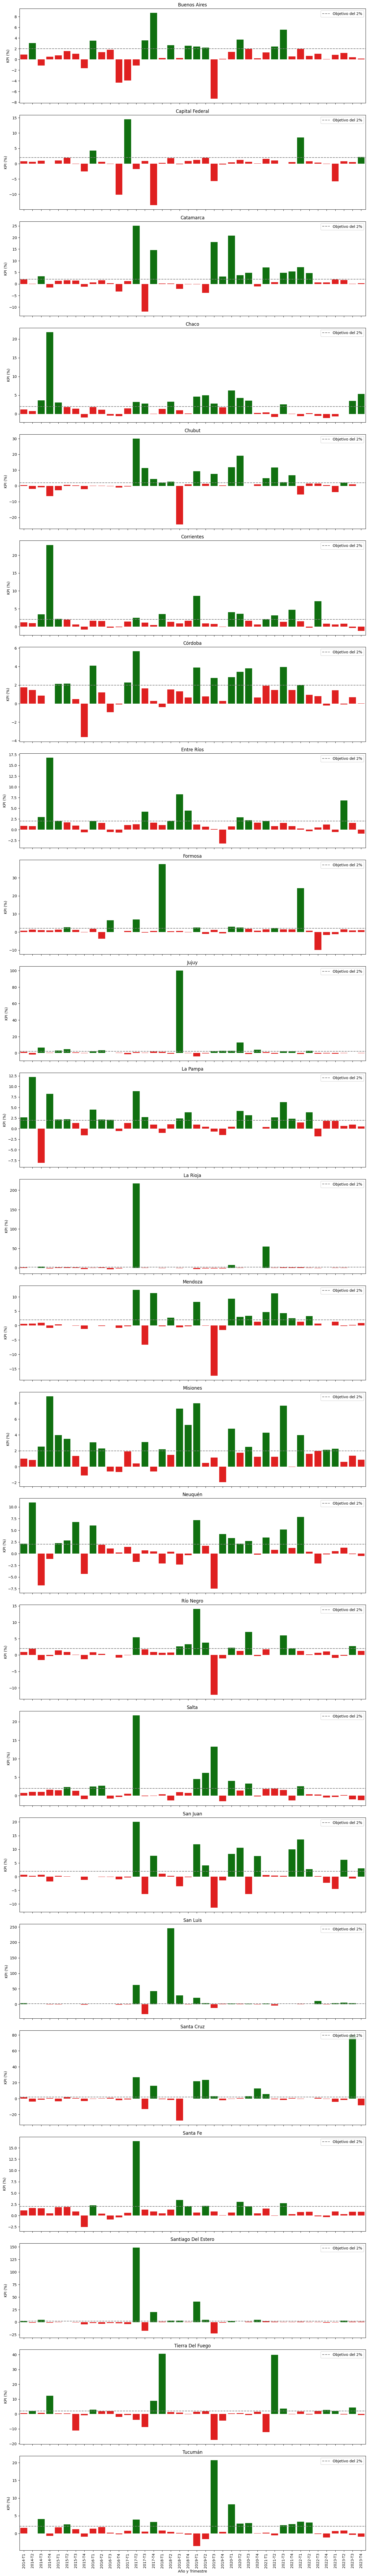

In [17]:
# Vamos a agregar una columna para indicar si se cumplió el objetivo del KPI (2%)
df_kpi1['cumplido'] = df_kpi1['KPI'] >= 2

df_kpi1['Año_Trimestre'] = df_kpi1['Año'].astype(str) + '-T' + df_kpi1['Trimestre'].astype(str) # Creamos una columna de Año y Trimestre para el eje x
provincias = df_kpi1['Provincia'].unique() #extraemos un listado de las provincias.

#Ya podemos graficar nuestra figura:
fig, axes = plt.subplots(nrows=len(provincias), ncols=1, figsize=(14, len(provincias) * 4), sharex=True)
for i, provincia in enumerate(provincias):
    ax = axes[i]
    data = df_kpi1[df_kpi1['Provincia'] == provincia]
    sns.barplot(x='Año_Trimestre', y='KPI', data=data, ax=ax, palette=['green' if val else 'red' for val in data['cumplido']])
    ax.axhline(2, color='gray', linestyle='--', label='Objetivo del 2%')
    ax.set_title(provincia)
    ax.set_xlabel('Año y Trimestre')
    ax.set_ylabel('KPI (%)')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Podemos ver en verde aquellos períodos en donde se cumple el objetivo del 2%, y en rojo aquellos casos en los que no se cumple (entre las 24 provincias del Dataframe). <br>
Se puede observar que en los últimos períodos hay una tendencia a no alcanzarse el objetivo del 2%. Sólo 5 de las 24 Provincias cumplieron el objetivo en el último trimestre: Capital Federal, San Juan, Chaco, La Rioja y San Luis. Hay casos curiosos como Entre Ríos y Santa Cruz, que en los períodos anteriores habían alcanzado el objetivo holgadamente. <br>
LAs estrategias actuales pueden ser generadoras de problemas regionales, o bien, la falta de infraestructura adecuada puede llevar a casos de tan insatisfactorio cumplimiento. <br>
Puede obervarse que en el primer trimestre del año 2019 hubo un gran margen de cumplimiento, de la mayoría de las provincias, en su mayoría con gran soltura. Es recomendable identificar también esa situación para corregir la tendencia final.